<a href="https://colab.research.google.com/github/ssunsonic/ML_Project/blob/main/Image_Preprocessing_Modeling_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Preprocessing and Initial CNN Rough Draft

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from PIL import Image
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Moved all test images into train folder since we can just split them into train and test anyway

In [63]:
dataset = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/ECS171/ML_Project/images/')

Found 4320 files belonging to 2 classes.


In [4]:
len(dataset)

135

In [6]:
# dataset_name = dataset
class_names = dataset.class_names
print(class_names)

['chihuahua', 'muffin']


### Split into Train/Validation

In [64]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/ECS171/ML_Project/images/',
            validation_split=0.2, subset = 'training', seed = 1)
ds_val = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/ECS171/ML_Project/images/',
            validation_split=0.2, subset = 'validation', seed = 1)

Found 4320 files belonging to 2 classes.
Using 3456 files for training.
Found 4320 files belonging to 2 classes.
Using 864 files for validation.


## Image Resizing

In [65]:
# size of images we want to resize to
size = (50,50)

In [66]:
# resize all images
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_val = ds_val.map(lambda image, label: (tf.image.resize(image, size), label))

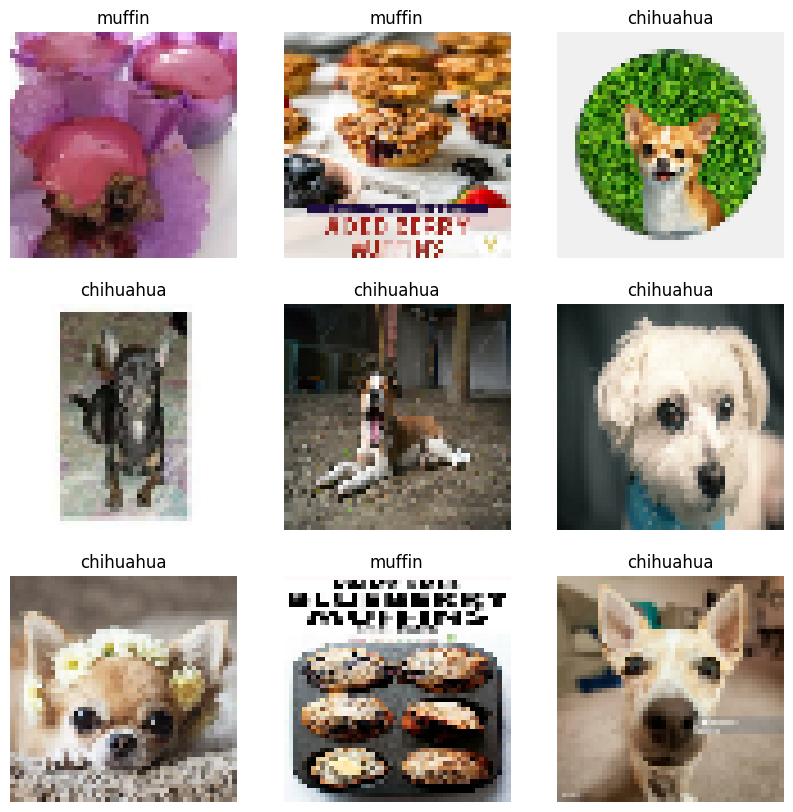

In [67]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  # display 9 resized images
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Greyscaling

In [68]:
ds_train = ds_train.map(lambda image, label: (tf.image.rgb_to_grayscale(image), label))
ds_val = ds_val.map(lambda image, label: (tf.image.rgb_to_grayscale(image), label))

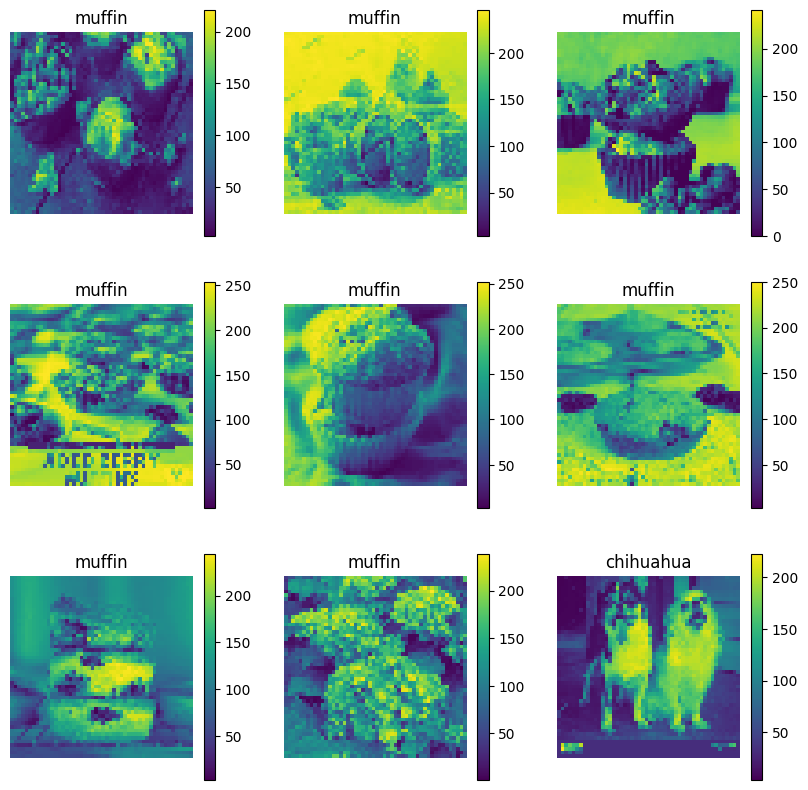

In [69]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.colorbar()

## Modeling

### CNN Keras Model


In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
# grayscaled images only have one channel not 3 for typical RGB
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# softmax to output probability predictions
model.add(layers.Dense(1, activation = 'sigmoid'))

Exception ignored in: <function _xla_gc_callback at 0x78ca973d2320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [46]:
from keras.losses import binary_crossentropy
# compile model
model.compile(optimizer = 'adam', loss = binary_crossentropy, metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 230400)           

In [47]:
history = model.fit(ds_train, validation_data = ds_val, epochs = 10, batch_size = 10000)

Epoch 1/10
108/108 [==============================] - 170s 1s/step - loss: 1.1994 - accuracy: 0.6826 - val_loss: 0.5401 - val_accuracy: 0.7477
Epoch 2/10
108/108 [==============================] - 51s 461ms/step - loss: 0.4380 - accuracy: 0.8041 - val_loss: 0.4123 - val_accuracy: 0.8113
Epoch 3/10
108/108 [==============================] - 44s 400ms/step - loss: 0.3893 - accuracy: 0.8368 - val_loss: 0.4197 - val_accuracy: 0.8044
Epoch 4/10
108/108 [==============================] - 41s 369ms/step - loss: 0.3354 - accuracy: 0.8602 - val_loss: 0.3966 - val_accuracy: 0.8299
Epoch 5/10
108/108 [==============================] - 43s 387ms/step - loss: 0.2823 - accuracy: 0.8825 - val_loss: 0.3548 - val_accuracy: 0.8553
Epoch 6/10
108/108 [==============================] - 40s 353ms/step - loss: 0.2364 - accuracy: 0.9034 - val_loss: 0.3479 - val_accuracy: 0.8634
Epoch 7/10
108/108 [==============================] - 47s 415ms/step - loss: 0.1821 - accuracy: 0.9277 - val_loss: 0.3748 - val_accu

In [ ]:
## Graphing Loss

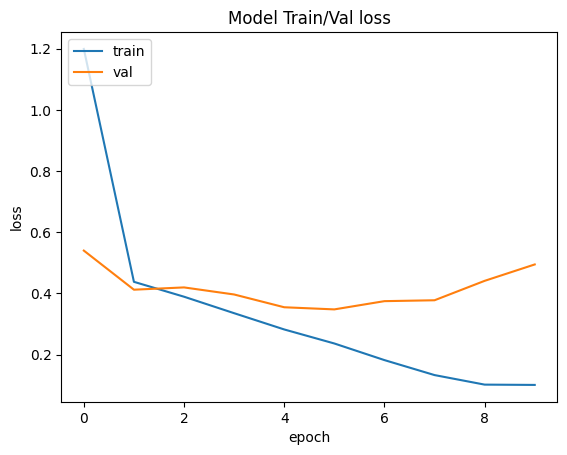

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Train/Val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()